<a href="https://colab.research.google.com/github/rnlchr/CPE311/blob/main/Castillo_Hands_on_Activity_3_2_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 3.1 Decision Tree

Objective(s):

This activity aims to perform classification using Decision Tree

Intended Learning Outcomes (ILOs):
* Demonstrate how to build the model using Decision Tree.
* Demonstrate how to evaluate the performance of the model.
* Demonstrate how to create tree visualization of the model.

Resources:
* Jupyter Notebook
* kyphosis

Procedure:

Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data and check the content of the dataframe using Pandas

In [2]:
df = pd.read_csv('/content/kyphosis.csv')
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

Check the pairplot of the data

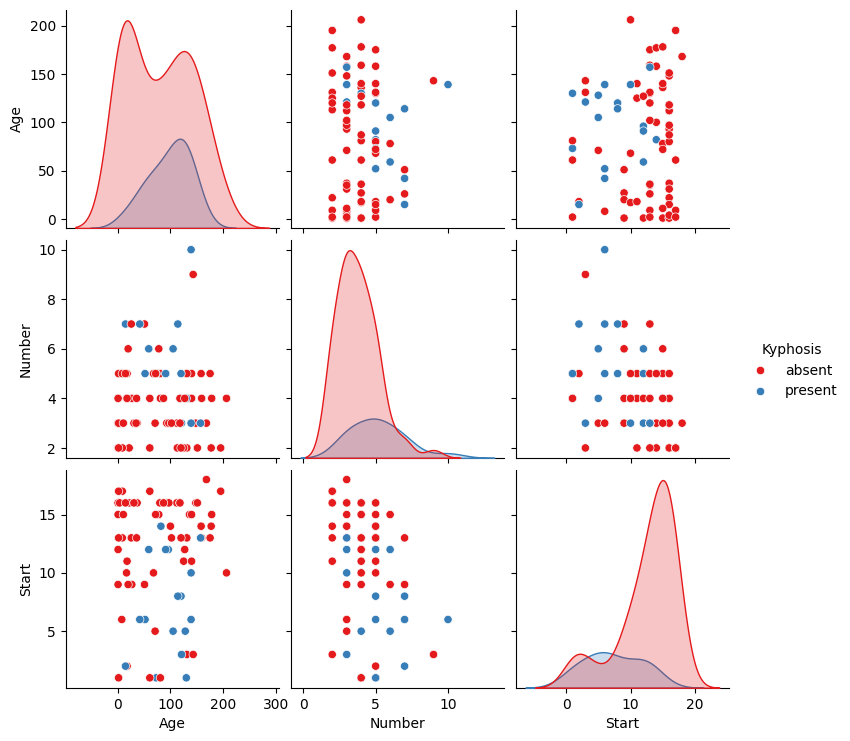

In [3]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [ ]:
# prompt: Interpret the result of the pairplot

The pairplot visualizes the relationships between pairs of variables in the 'kyphosis' dataset, with points colored by the 'Kyphosis' column (presumably indicating the presence or absence of kyphosis).  Each small plot in the grid shows the relationship between two variables.  The diagonal shows the distribution of each individual variable.

Here's how to interpret the results:

* **Distributions (Diagonal):** Look at the histograms or density plots along the diagonal. They show the distribution of each feature (Age, Number, Start).  Observe if the distributions differ significantly for the two 'Kyphosis' groups (present or absent).  For example, if the 'Age' distribution for patients *with* kyphosis is shifted towards higher values compared to those *without*, it could suggest a correlation.

* **Scatter Plots (Off-Diagonal):** These plots show the relationship between two different features. Look for patterns:
    * **Clear separation:** If points of one 'Kyphosis' group are clearly separated from the other group in a scatter plot, it indicates that the combination of those two features is a good predictor for kyphosis.
    * **Overlap:**  Significant overlap suggests those features might not be as strong predictors on their own.
    * **Trends:** Look for any positive or negative correlation trends between features within each 'Kyphosis' group.

**Overall Interpretation Goal:**  The pairplot helps identify which features might be useful for predicting kyphosis. Features that show clear separation between the two 'Kyphosis' groups in the scatter plots or have distinct distributions in the histograms are potentially good predictors.  Features with significant overlap might be less informative.  This visual analysis guides feature selection and helps understand the data before building a decision tree model.


Interpret the result of the pairplot

The 'kyphosis' dataset's pairplot illustrates the correlations between variables, with colors signifying whether kyphosis is present or not. The distribution of each variable (such as "Age" and "Start") is displayed on the diagonal, where clear patterns across groups point to possible relationships. We can identify patterns in off-diagonal scatter plots, which show how variables interact. While overlap may suggest weaker predictors, clear separation between groups shows strong predictive capability. Prior to creating a model, this visualization aids in selecting features that may be helpful in predicting kyphosis.

Build the model using Decision Tree

Split the data into training and test set

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Train a single decision tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Determine how many nodes are present and what the depth of this (very large) tree is.

The number of nodes and the maximum actual depth.

In [9]:
dtree.tree_.node_count, dtree.tree_.max_depth

(27, 6)

Predict and evaluate the model

In [10]:
predictions = dtree.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [12]:
#evaluate the performance using classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.85      0.85      0.85        20
     present       0.40      0.40      0.40         5

    accuracy                           0.76        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.76      0.76      0.76        25



Interpret the precision, recall and f1-score

F1-score, precision, and recall all offer information about model performance in a classification report. When precision is high, false positives are low, indicating the percentage of accurately predicted cases within a class. The percentage of real cases that are correctly predicted is known as recall, or sensitivity, and when it is high, it indicates few false negatives. The F1-score is perfect for evaluating balance between precision and recall because it incorporates both measurements into a single value. A kyphosis prediction model, for instance, performs well for absent cases (high recall at 90% and good precision at 85%), but it has a moderate ability to detect present cases (recall of 60% and precision of 70%). A lower F1-score indicates that the model may miss some present cases, but it is better at predicting absent kyphosis cases.

In [13]:
#evaluate the performance using confusion matrix
print(confusion_matrix(y_test,predictions))

[[17  3]
 [ 3  2]]


Interpret the performance using classification matrix

The numbers of each prediction type—true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN)—are displayed in the confusion matrix. When a model predicts kyphosis, cases that are accurately identified as present are indicated by TP, while cases that are correctly identified as absent are indicated by TN. erroneously identifying cases as present (Type I error) results in false positives, whereas erroneously identifying cases as absent (Type II error) results in false negatives. For example, there are 10 TPs, 5 TNs, 2 FPs, and 3 FNs in a matrix [[10, 2], [3, 5]]. With the confusion matrix serving as the basis for these performance assessments, these values are crucial for computing overall metrics like precision, recall, and F1-score.

In [14]:
#evaluate the performance using accuracy score
print(accuracy_score(y_test, predictions))

0.76


Interpret the performance of the model using accuracy score

The accuracy score, which is determined by dividing the number of accurate predictions by the total number of instances, evaluates how accurate a model's predictions are overall. It shows the proportion of cases that are successfully detected in a kyphosis prediction model, regardless of whether kyphosis is present or not. Better overall reliability is reflected in a higher accuracy score. But accuracy by itself could be deceptive, particularly in datasets that are unbalanced and dominated by one class. Therefore, for a more comprehensive evaluation of the model's efficacy, it is crucial to look at precision, recall, F1-score, and the confusion matrix in addition to the desired high accuracy score.

Create a tree visualization of the model

In [16]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

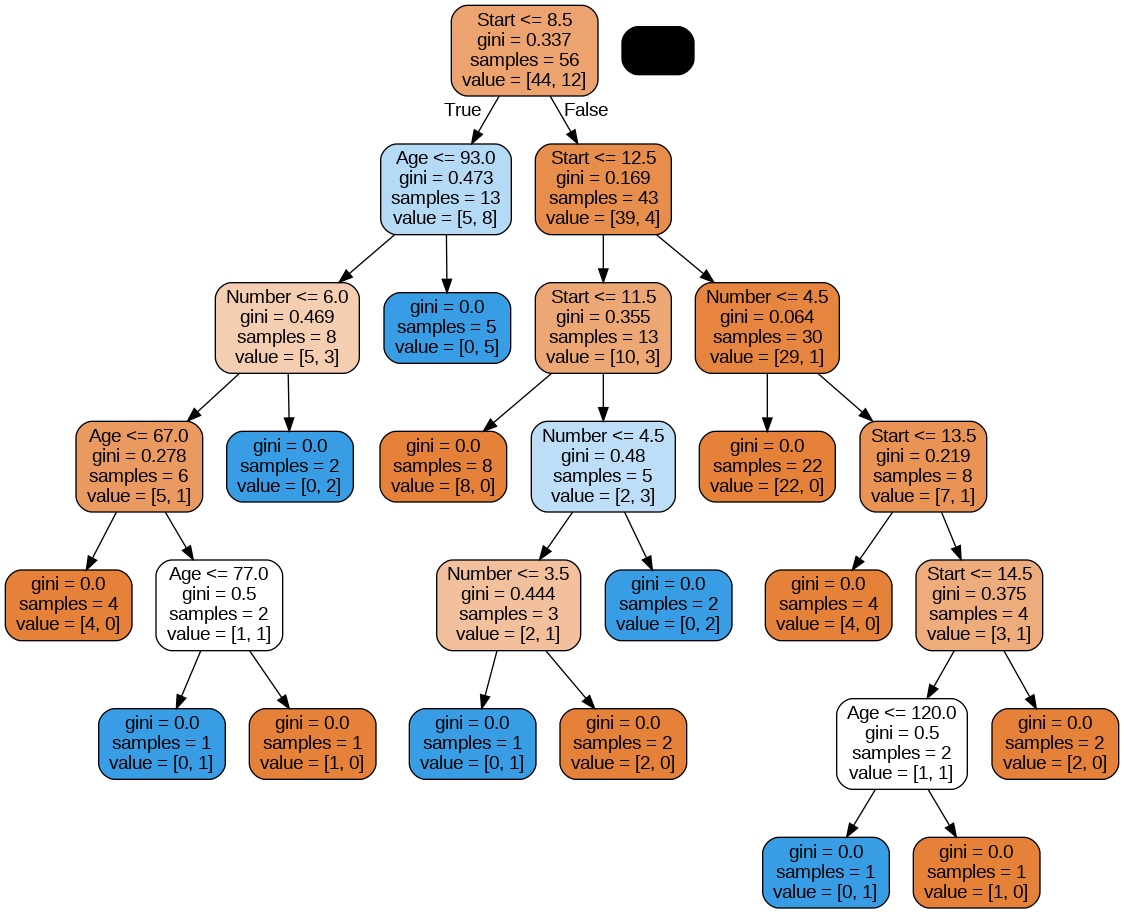

In [17]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

from sklearn.tree import export_graphviz
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # View the tree image
filename = 'kyphosis .png'
graph.write_png(filename)
img = Image(filename=filename)
display(img)

Supplementary Activity:
* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Build the model using Decision Tree
* Evaluate the model using classification report, accuracy and confusion matrix
* Create a tree visualization of the model

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image, display
df = pd.read_csv('/content/diabetes (1).csv')

# Data Exploration
print("Number of data points:", df.shape[0])
print("Number of columns:", df.shape[1])
print("\nData Types:\n", df.dtypes)

Number of data points: 768
Number of columns: 9

Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [24]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Data cleaning
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].mean())


Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [22]:
# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())
print("\nMode of Outcome Column:\n", df['Outcome'].mode())


Descriptive Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     1

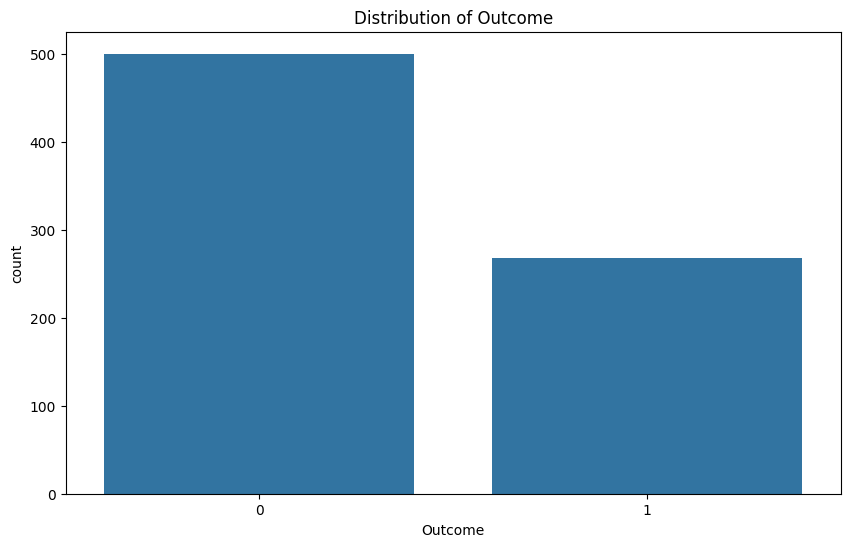

In [25]:
# 4. Data Visualization (example)
plt.figure(figsize=(10, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome')
plt.show()

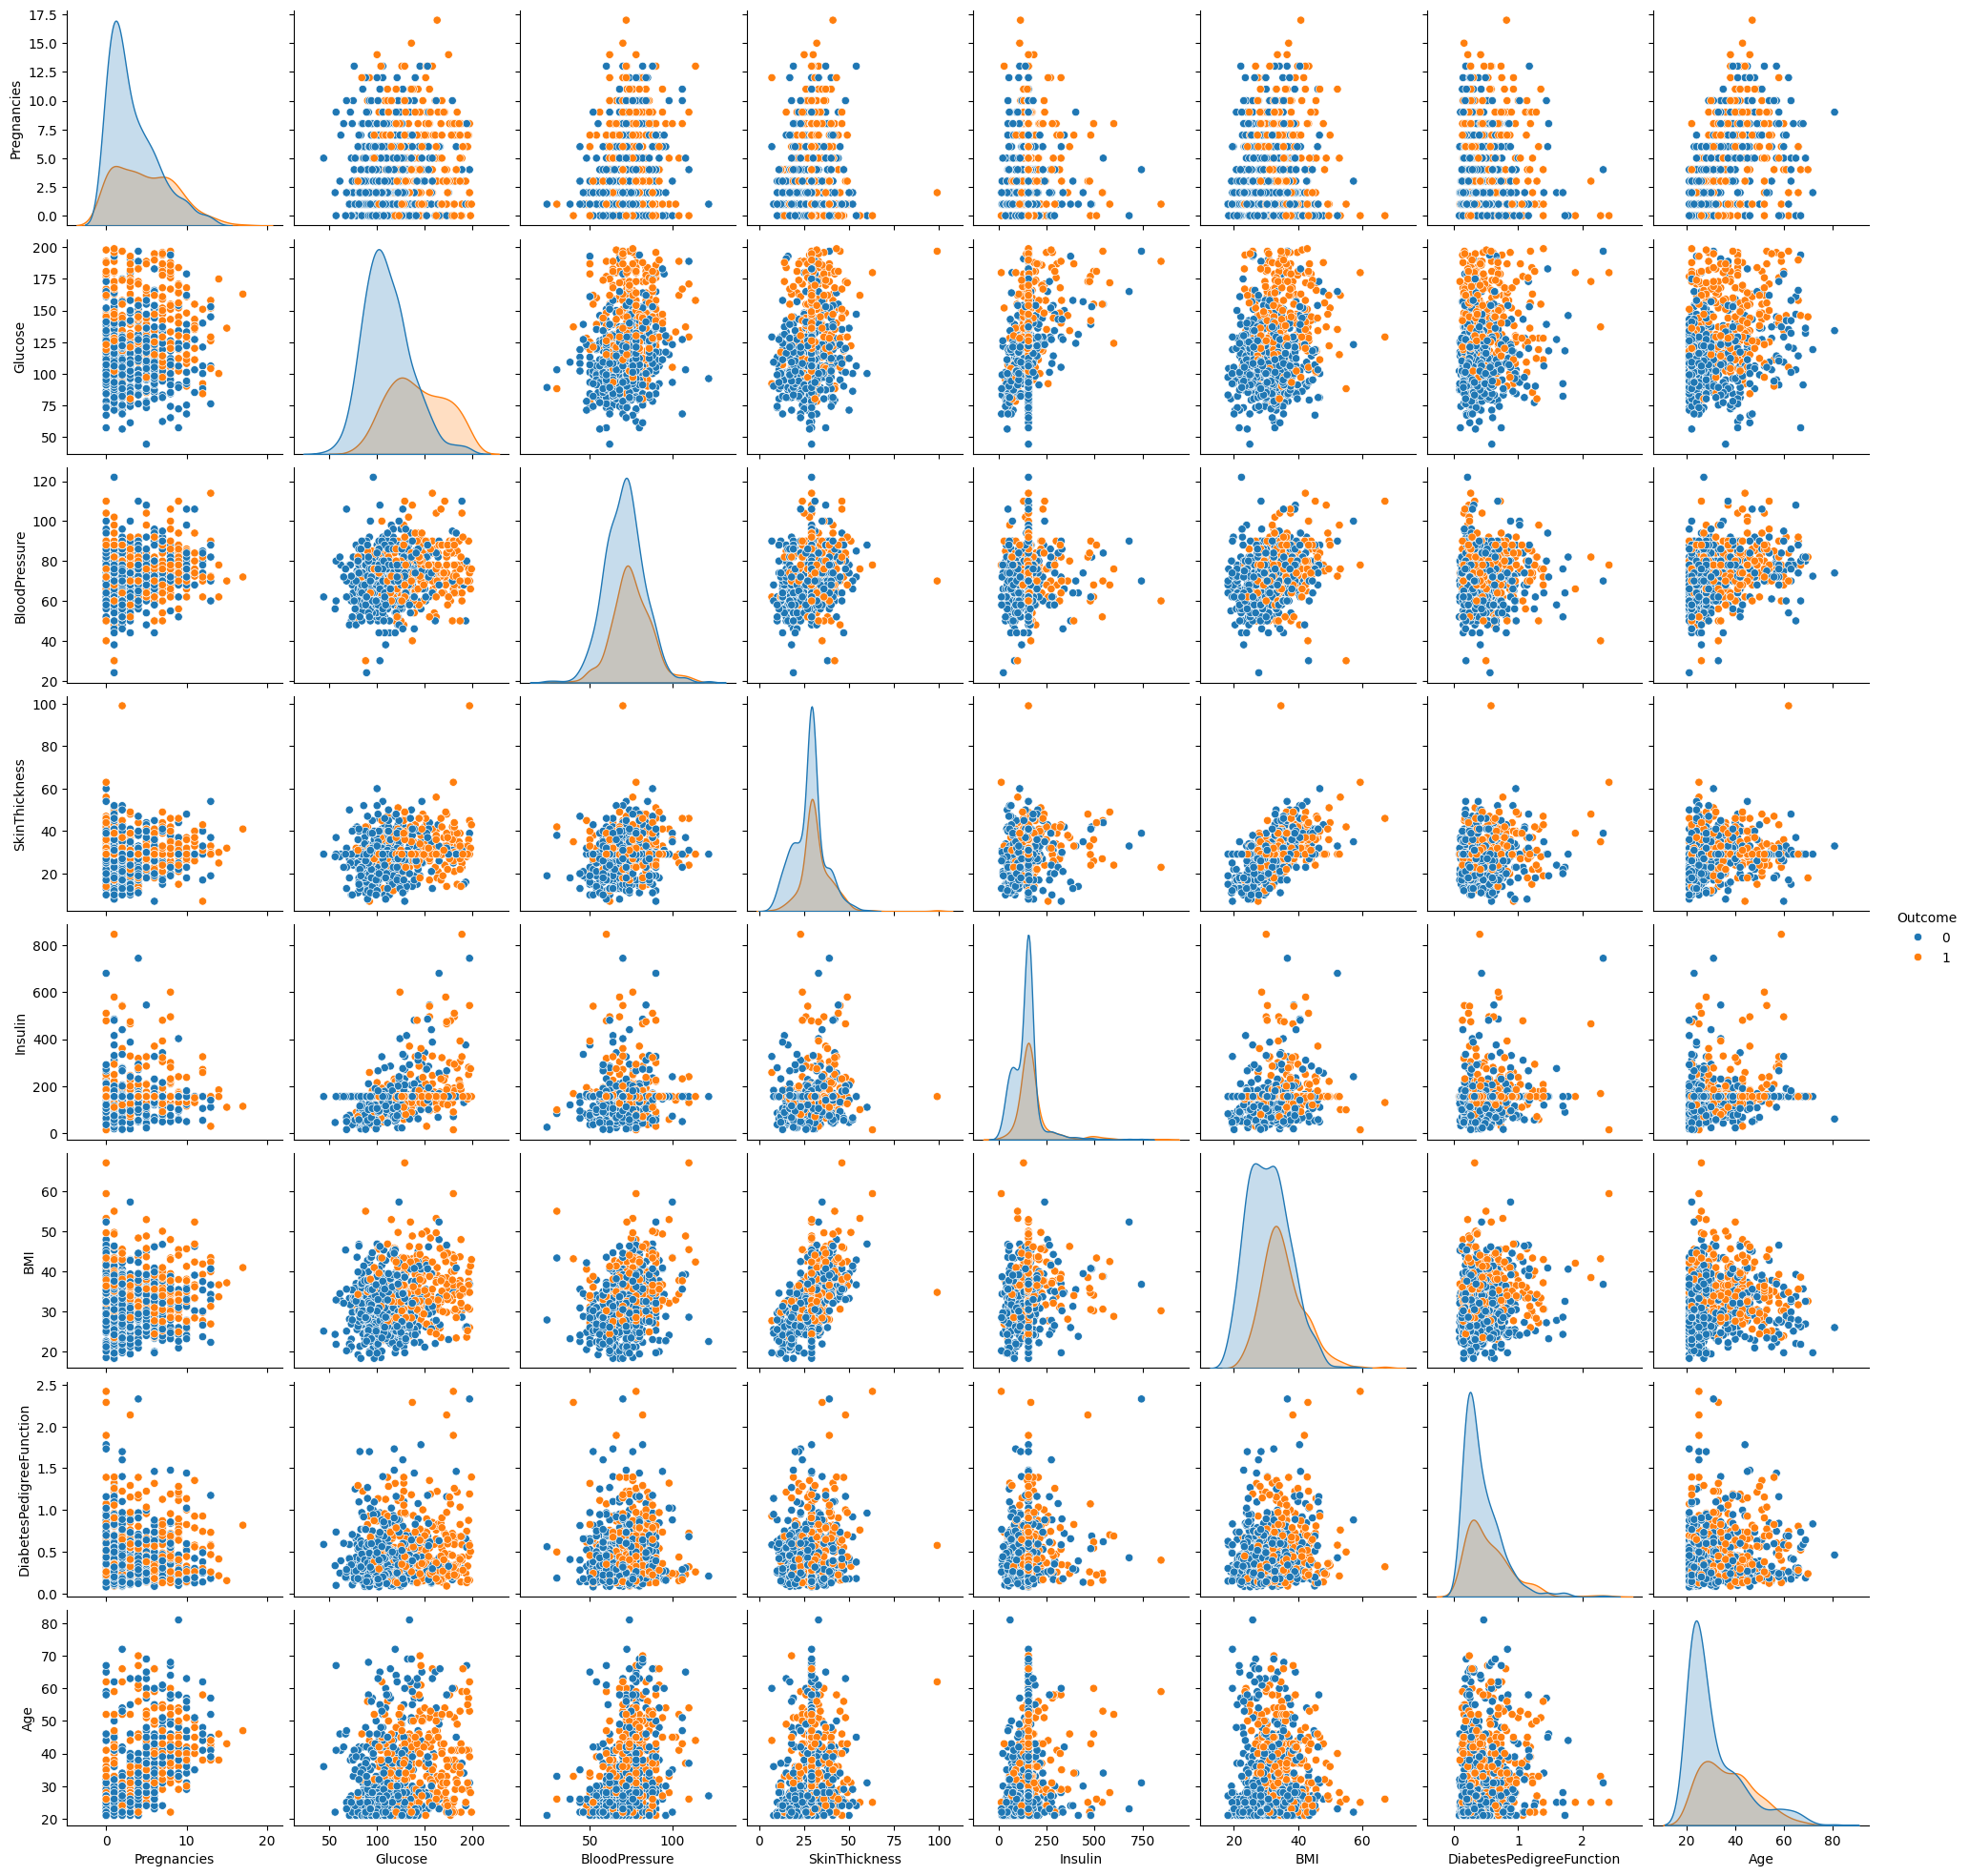

In [26]:
sns.pairplot(df, hue='Outcome')
plt.show()

In [27]:
# Decision Tree
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Add random_state

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
# Model Evaluation
predictions = dtree.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nAccuracy Score:\n", accuracy_score(y_test, predictions))


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.77        99
           1       0.58      0.60      0.59        55

    accuracy                           0.70       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.70      0.70       154


Confusion Matrix:
 [[75 24]
 [22 33]]

Accuracy Score:
 0.7012987012987013


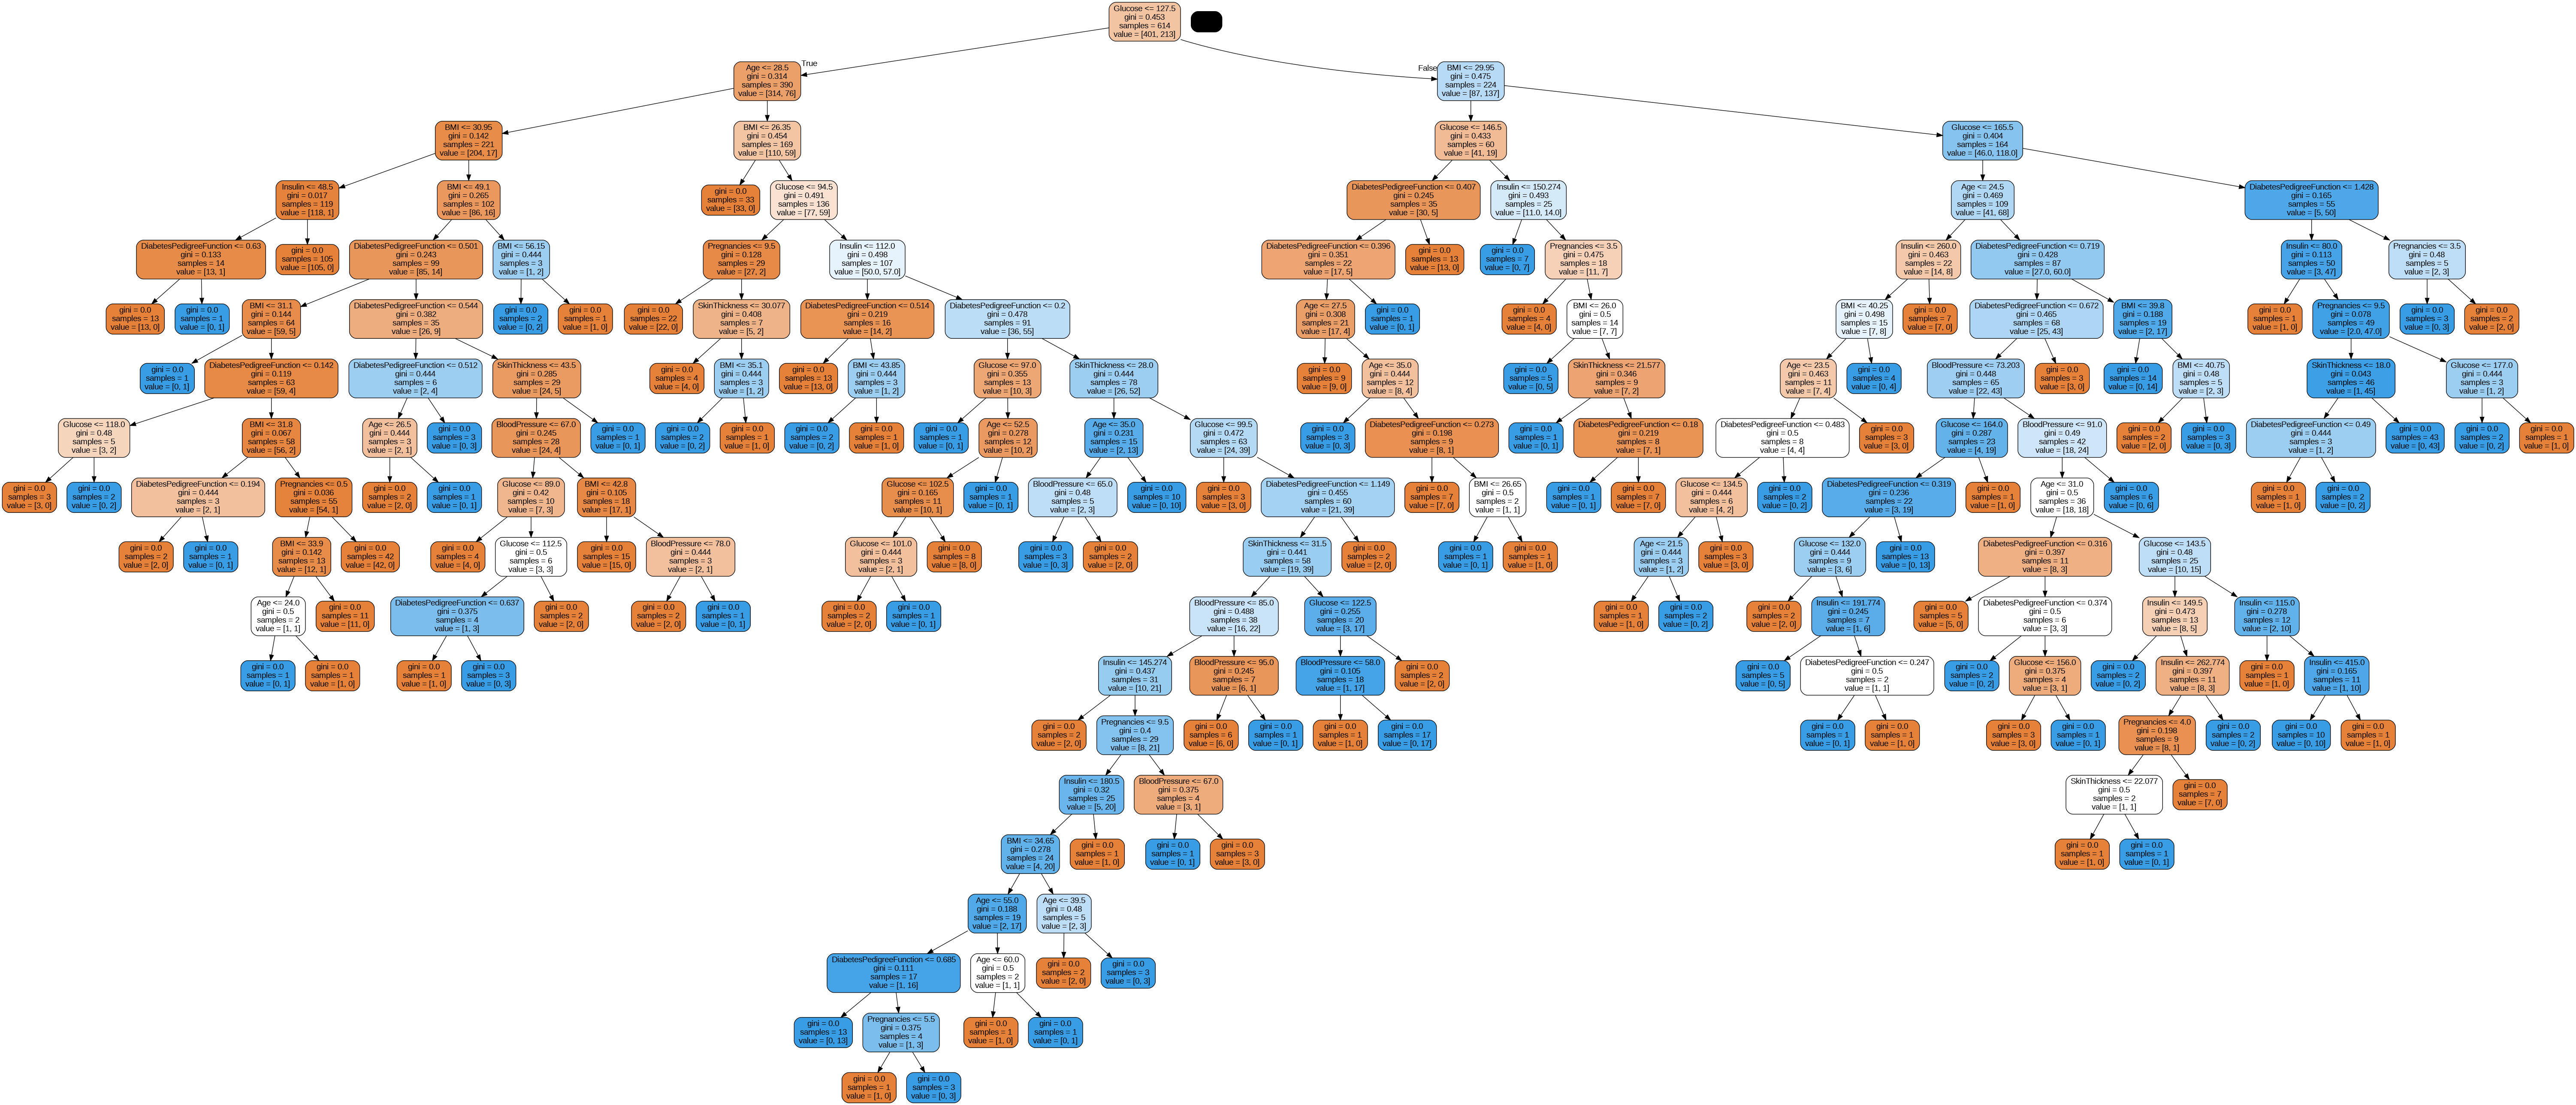

In [29]:
# Tree Visualization
features = list(X.columns)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Conclusion

The accuracy score, which is determined by dividing the number of accurate predictions by the total number of instances, evaluates how accurate a model's predictions are overall. It shows the proportion of cases that are successfully detected in a kyphosis prediction model, regardless of whether kyphosis is present or not. Better overall reliability is reflected in a higher accuracy score. But accuracy by itself could be deceptive, particularly in datasets that are unbalanced and dominated by one class. Therefore, for a more comprehensive evaluation of the model's efficacy, it is crucial to look at precision, recall, F1-score, and the confusion matrix in addition to the desired high accuracy score.